# AnalyzeEDGBWaveforms.ipynb

Maria Okounkova (mokounkova@pasadena.edu)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

### Helper functions

Functions for computing and subtracting peak times

In [3]:
def GetPeakTime(time, data): 
    """ Grab the peak time of some data """
    t_peak = time[np.argmax(data)]
    return t_peak

def SubtractPeakTime(time, data): 
    """ Subtract the peak time of some data """
    t_peak = GetPeakTime(time, data)
    return time - t_peak

### Read in the waveforms

In [4]:
## Read in the extrapolated modes
def ReadWaveformModes(file, mode_l = '2', mode_m = '2'):
    """ 
        File is the file containing the extrapolated waveform that we want to read in 
        mode_l is the l spin-weighted spherical harmonic mode of the waveform that we would like (default l = 2), 
        and mode_m is the m spin-weighted spherical harmonic mode that we would like (default m = 2)
    """

    ## Read in the data
    f = h5py.File(file, 'r')
    
    ## grab the length of the waveform first
    data = f['Extrapolated_N2.dir']['Y_l' + mode_l + '_m' + mode_m + '.dat']
    time = np.array(data[:,0])
    
    ## Real and imaginary parts of the waveform
    data_real = np.array(data[:,1])
    data_imag = np.array(data[:,2])
    
    ## Now subtract off the peak time
    amp = np.sqrt(data_real**2 + data_imag**2)
    time = time - time[np.argmax(amp)]

    return time, data_real, data_imag
    

### Plot the waveforms we want

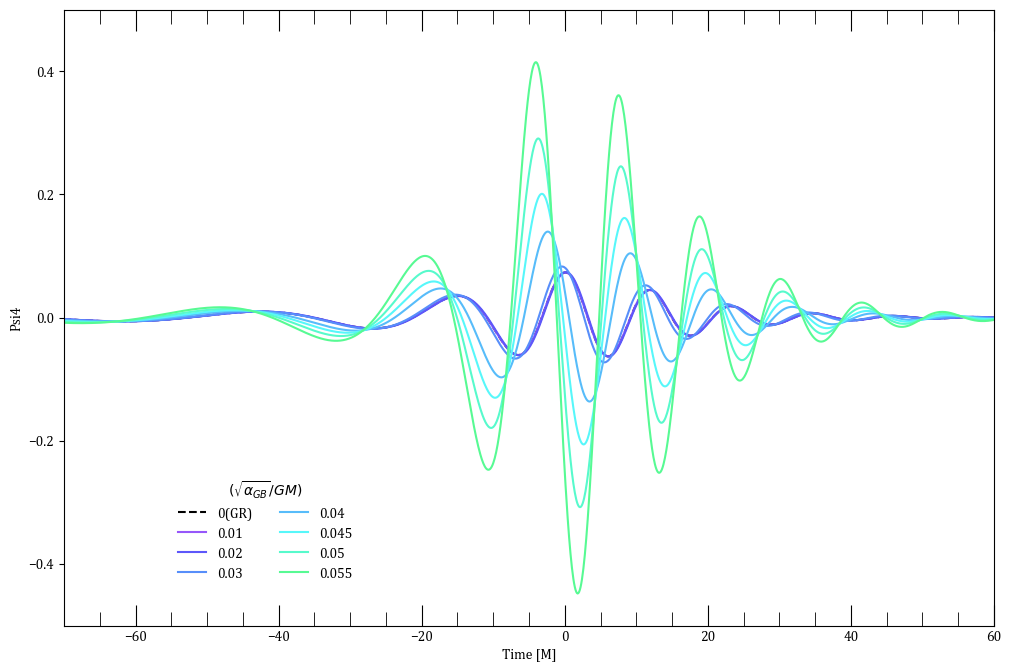

In [10]:
plt.rcParams["font.family"] = "Cambria"
plt.figure(figsize=(12, 8))



## Edit to include the file that you want
time0p0, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p0.h5')
time0p01, data_real0p01, data_imag0p01 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p01.h5')
time0p02, data_real0p02, data_imag0p02 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p02.h5')
time0p03, data_real0p03, data_imag0p03 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p03.h5')
time0p04, data_real0p04, data_imag0p04 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p04.h5')
time0p045, data_real0p045, data_imag0p045 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p045.h5')
time0p05, data_real0p05, data_imag0p05 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p05.h5')
time0p055, data_real0p055, data_imag0p055 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p055.h5')
    
plt.plot(time0p0, data_real0p0, linestyle='--', color='Black', label='0(GR)') 
plt.plot(time0p01, data_real0p01, color='#9657fa', label='0.01')
plt.plot(time0p02, data_real0p02, color='#5d57fa', label='0.02')
plt.plot(time0p03, data_real0p03, color='#578efa', label='0.03')
plt.plot(time0p04, data_real0p04, color='#57bcfa', label='0.04')
plt.plot(time0p045, data_real0p045, color='#57f7fa', label='0.045')
plt.plot(time0p05, data_real0p05, color='#57facc', label='0.05')
plt.plot(time0p055, data_real0p055, color='#57fa93', label='0.055')

plt.legend(loc='lower left', 
           ncol=2, borderpad=1,
           bbox_to_anchor=(0.1,0.04), 
           frameon=False, 
           title=r'$(\sqrt{\alpha_{GB}}/GM)$')
plt.minorticks_on()
plt.tick_params(axis='y', which='minor', left=False)
plt.tick_params(axis='x', which='minor', direction='in', length=10, top=True)
plt.tick_params(axis='x', which='major', direction='in', length=15, top=True)
plt.xlim([-70,60])
plt.ylim([-.5,.5])
plt.xlabel('Time [M]')
plt.ylabel('Psi4')
plt.show()